#### Hand in: all details of your computations (the design of your neural network, the information table of the neural network. Find the best learning rate by the . )


# Problem   Train a deep neural network on the MRI slices dataset. 

 
The dementia level for the Oasis 1 MRI dataset is based on a patient assessment. As a result, it is not clear whether the levels of 0, .5, 1 and 2 should actually be understood as meaningfully numeric, or if they in fact are categorical labels. 

To load all of the files into an array we need to be able to search through the directory. Luckily, this is easy to do using the labels file, since each file name is stored there. We just need to loop through the __Filename__ column in the `labels` dataset and load them into an array one by one. There are 702 files in total. 

With the array there are two ways we can load them in: First, we can load them into a $609\times 176 \times 176$ array, which is the best option if we care about the 2D structure. However for algorithms like linear regression that can not see the 2D structure, we may want to flatten the images to a $609\times 30976$ array (note that $30976 = 176 \times 176$). Its easy enough two switch back and forth between the two array structures later. We will start with the flattened array. 

__Note:__ It is very import that we perform the train test split _before_ we expand the dataset through down sampling. If not, we are effectively training on the test data. 
 
Try searching for the optimal learning rate by using the approach presented in this chapter (i.e., by growing the learning rate exponentially, plotting the loss, and finding the point where the loss shoots up). 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

In [2]:
file_dir = 'Downloads/MRI_Images/'
labels = pd.read_csv(file_dir + 'labels.csv')
# Using directory 
display(labels)
y = labels.CDR
y=(y*2).astype(int)

,Unnamed: 0,Filename,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,Slice
0,0,OAS1_0001_MR1_55.png,OAS1_0001_MR1,F,R,74,2,3.0,29,0.0,1344,0.743,1.306,NaN,55
1,1,OAS1_0001_MR1_120.png,OAS1_0001_MR1,F,R,74,2,3.0,29,0.0,1344,0.743,1.306,NaN,120
2,2,OAS1_0001_MR1_180.png,OAS1_0001_MR1,F,R,74,2,3.0,29,0.0,1344,0.743,1.306,NaN,180
3,3,OAS1_0002_MR1_55.png,OAS1_0002_MR1,F,R,55,4,1.0,29,0.0,1147,0.810,1.531,NaN,55
4,4,OAS1_0002_MR1_120.png,OAS1_0002_MR1,F,R,55,4,1.0,29,0.0,1147,0.810,1.531,NaN,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,604,OAS1_0449_MR1_120.png,OAS1_0449_MR1,F,R,71,3,4.0,29,0.0,1264,0.818,1.388,NaN,120
605,605,OAS1_0449_MR1_180.png,OAS1_0449_MR1,F,R,71,3,4.0,29,0.0,1264,0.818,1.388,NaN,180
606,606,OAS1_0456_MR1_55.png,OAS1_0456_MR1,M,R,61,5,2.0,30,0.0,1637,0.780,1.072,NaN,55
607,607,OAS1_0456_MR1_120.png,OAS1_0456_MR1,M,R,61,5,2.0,30,0.0,1637,0.780,1.072,NaN,120


In [3]:
data = np.zeros([609, 30976])

for n, file_name in enumerate(labels.Filename):
    data[n,:] = np.mean(matplotlib.image.imread(file_dir + file_name),axis=2).reshape(-1)
# Now we can use the file name to read the data

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(data, y, test_size=0.2, random_state=0)
print(y_train.shape, y_valid.shape)

(487,) (122,)


In [5]:
print(data.shape)
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(609, 30976)
(487, 30976) (487,)
(122, 30976) (122,)


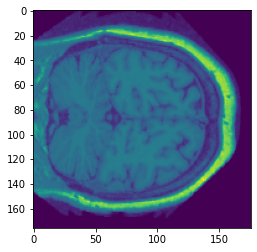

In [6]:
plt.imshow(X_train[1].reshape(176,176))

In [7]:
max(X_train[1]) 
#The value already be normalized
#Normalize the data if the data is not normalized
#X_valid, X_train = X_valid / 255., X_train / 255. 

0.7598039507865906

In [8]:
import tensorflow as tf

In [9]:
from tensorflow import keras

In [10]:
tf.__version__

'2.7.0'

In [13]:
print(X_train.shape, X_valid.shape)
print(y_train.shape, y_valid.shape)

(487, 30976) (122, 30976)
(487,) (122,)


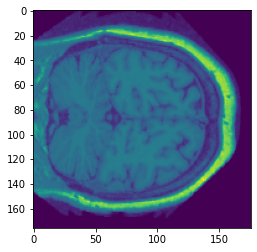

In [14]:
plt.imshow(X_train[1].reshape(176,176))

In [15]:
y_train

503    0
90     0
528    2
446    1
200    1
      ..
277    0
9      0
359    0
192    0
559    1
Name: CDR, Length: 487, dtype: int64

In [16]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(487, 30976) (487,)
(122, 30976) (122,)


In [17]:
X_train.dtype

dtype('float64')

In [18]:
class_names = ["0", "1", "2", "4"]

In [19]:
class_names[y_train[0]]

'0'

In [20]:
X_valid.shape

(122, 30976)

In [21]:
X_train.shape

(487, 30976)

In [22]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[309768]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [23]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [51]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[30976]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [52]:
model.layers

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 30976)             0         
                                                                 
 dense_3 (Dense)             (None, 300)               9293100   
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 9,324,210
Trainable params: 9,324,210
Non-trainable params: 0
_________________________________________________________________


In [54]:
from keras.utils.vis_utils import plot_model

In [55]:
keras.utils.plot_model(model, "my_mri_model.png", show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [56]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [57]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [58]:
keras.utils.plot_model(model, "my_mri_model.png", show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [59]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [60]:
model.get_layer(hidden1.name) is hidden1

True

In [61]:
weights, biases = hidden1.get_weights()

In [62]:
weights

array([[ 0.0066547 , -0.00444933,  0.00191833, ..., -0.01145265,
        -0.00840271,  0.00584582],
       [-0.01017812,  0.00866856, -0.01349494, ..., -0.01310385,
        -0.00574011, -0.01212545],
       [-0.00602223, -0.00059059,  0.0076371 , ..., -0.00602798,
         0.00365967, -0.00153686],
       ...,
       [-0.00126623,  0.00455396,  0.00593162, ..., -0.00722478,
        -0.00503658,  0.00884821],
       [-0.01153642,  0.01094453, -0.00974216, ...,  0.00877635,
         0.0125655 ,  0.01258388],
       [ 0.0091007 ,  0.00690378,  0.01361441, ...,  0.00181471,
        -0.00528147, -0.00062054]], dtype=float32)

In [63]:
weights.shape

(30976, 300)

In [64]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [65]:
biases.shape

(300,)

In [66]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [71]:
history = model.fit(X_train, y_train,
          batch_size=128 , epochs=30,
          verbose=1,
          validation_data=(X_valid, y_valid))

Epoch 1/30
4/4 [==============================] - 0s 87ms/step - loss: 0.9938 - accuracy: 0.5791 - val_loss: 1.0431 - val_accuracy: 0.5410
Epoch 2/30
4/4 [==============================] - 0s 70ms/step - loss: 0.9709 - accuracy: 0.5791 - val_loss: 1.0444 - val_accuracy: 0.5410
Epoch 3/30
4/4 [==============================] - 0s 67ms/step - loss: 0.9743 - accuracy: 0.5791 - val_loss: 1.0447 - val_accuracy: 0.5410
Epoch 4/30
4/4 [==============================] - 0s 81ms/step - loss: 0.9756 - accuracy: 0.5791 - val_loss: 1.0430 - val_accuracy: 0.5410
Epoch 5/30
4/4 [==============================] - 0s 72ms/step - loss: 0.9725 - accuracy: 0.5791 - val_loss: 1.0403 - val_accuracy: 0.5410
Epoch 6/30
4/4 [==============================] - 0s 78ms/step - loss: 0.9740 - accuracy: 0.5791 - val_loss: 1.0383 - val_accuracy: 0.5410
Epoch 7/30
4/4 [==============================] - 0s 69ms/step - loss: 0.9752 - accuracy: 0.5791 - val_loss: 1.0472 - val_accuracy: 0.5410
Epoch 8/30
4/4 [===========

In [72]:
historysgd = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
16/16 [==============================] - 1s 34ms/step - loss: 0.9755 - accuracy: 0.5791 - val_loss: 1.0442 - val_accuracy: 0.5410
Epoch 2/30
16/16 [==============================] - 1s 39ms/step - loss: 0.9856 - accuracy: 0.5791 - val_loss: 1.0752 - val_accuracy: 0.5410
Epoch 3/30
16/16 [==============================] - 1s 59ms/step - loss: 0.9902 - accuracy: 0.5791 - val_loss: 1.0921 - val_accuracy: 0.5410
Epoch 4/30
16/16 [==============================] - 1s 53ms/step - loss: 0.9776 - accuracy: 0.5791 - val_loss: 1.2036 - val_accuracy: 0.2869
Epoch 5/30
16/16 [==============================] - 1s 37ms/step - loss: 0.9865 - accuracy: 0.5585 - val_loss: 1.0765 - val_accuracy: 0.5410
Epoch 6/30
16/16 [==============================] - 1s 35ms/step - loss: 0.9784 - accuracy: 0.5791 - val_loss: 1.1041 - val_accuracy: 0.5410
Epoch 7/30
16/16 [==============================] - 1s 38ms/step - loss: 0.9891 - accuracy: 0.5791 - val_loss: 1.0957 - val_accuracy: 0.5410
Epoch 8/30
16

In [73]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 4}

In [74]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [75]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

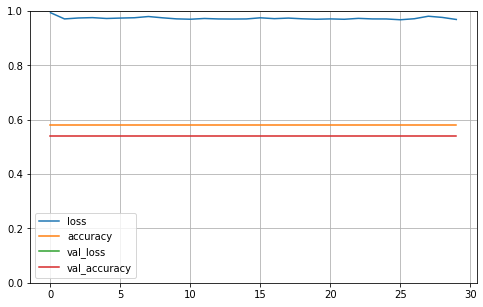

In [76]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
 
plt.show()

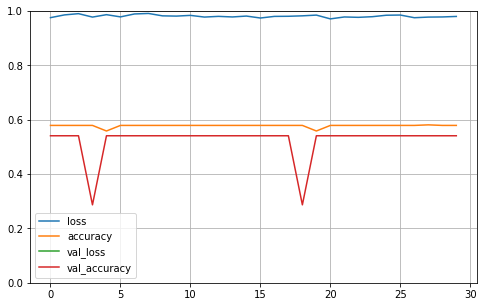

In [77]:
pd.DataFrame(historysgd.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
 
plt.show()

In [79]:
print(X_valid.shape, y_valid.shape)

(122, 30976) (122,)


In [80]:
model.evaluate(X_valid, y_valid)

4/4 [==============================] - 0s 10ms/step - loss: 1.1023 - accuracy: 0.5410


[1.1023311614990234, 0.5409836173057556]

In [82]:
X_new = X_valid[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.52, 0.41, 0.07, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.53, 0.41, 0.06, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.52, 0.41, 0.06, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [83]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([0, 0, 0])

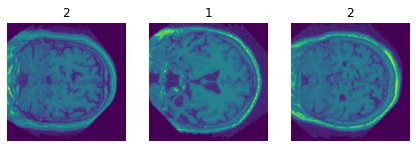

In [235]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image.reshape(176,176))
    plt.axis('off')
    plt.title(class_names[y_valid.iloc[index]], fontsize=12)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()
 

In [84]:
np.array(class_names)[y_pred]

array(['0', '0', '0'], dtype='<U1')

In [86]:
y_new = y_valid[:3]
y_new

576    2
52     1
531    2
Name: CDR, dtype: int64

In [94]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [95]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [97]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[30976]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [98]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [99]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

16/16 [==============================] - 2s 124ms/step - loss: 1.2657 - accuracy: 0.5339 - val_loss: 1.1123 - val_accuracy: 0.5410


Text(0, 0.5, 'Loss')

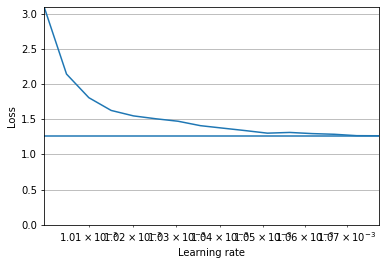

In [100]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [101]:
min(expon_lr.losses)

1.2656644582748413

In [102]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [106]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[30976]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [127]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=8e-1),
              metrics=["accuracy"])

In [128]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
16/16 [==============================] - 1s 36ms/step - loss: 0.9827 - accuracy: 0.5791 - val_loss: 1.0472 - val_accuracy: 0.5410
Epoch 2/30
16/16 [==============================] - 1s 34ms/step - loss: 0.9874 - accuracy: 0.5791 - val_loss: 1.0440 - val_accuracy: 0.5410
Epoch 3/30
16/16 [==============================] - 0s 31ms/step - loss: 0.9870 - accuracy: 0.5791 - val_loss: 1.0627 - val_accuracy: 0.5410
Epoch 4/30
16/16 [==============================] - 1s 32ms/step - loss: 0.9826 - accuracy: 0.5791 - val_loss: 1.1140 - val_accuracy: 0.2869
Epoch 5/30
16/16 [==============================] - 1s 32ms/step - loss: 0.9865 - accuracy: 0.5647 - val_loss: 1.0555 - val_accuracy: 0.5410
Epoch 6/30
16/16 [==============================] - 0s 29ms/step - loss: 0.9805 - accuracy: 0.5791 - val_loss: 1.0698 - val_accuracy: 0.5410
Epoch 7/30
16/16 [==============================] - 0s 32ms/step - loss: 0.9891 - accuracy: 0.5791 - val_loss: 1.0586 - val_accuracy: 0.5410
Epoch 8/30
16

In [129]:
model.evaluate(X_valid, y_valid)

4/4 [==============================] - 0s 11ms/step - loss: 1.0633 - accuracy: 0.5410


[1.0632781982421875, 0.5409836173057556]

In [135]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, callbacks
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[30976]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=8e-1),
              metrics=["accuracy"])


In [136]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mri_logs", "run_{:03d}".format(run_index))
run_logdir

'./my_mri_logs/run_001'

In [137]:
import os

In [138]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mri_logs", "run_{:03d}".format(run_index))
run_logdir

'./my_mri_logs/run_001'

In [139]:
early_stopping_cb = keras.callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_m_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
16/16 [==============================] - 1s 43ms/step - loss: 2023778.0000 - accuracy: 0.4723 - val_loss: 1.4739 - val_accuracy: 0.5410
Epoch 2/100
16/16 [==============================] - 1s 36ms/step - loss: 1.1930 - accuracy: 0.5791 - val_loss: 1.1398 - val_accuracy: 0.5410
Epoch 3/100
16/16 [==============================] - 1s 39ms/step - loss: 1.0423 - accuracy: 0.5791 - val_loss: 1.1789 - val_accuracy: 0.2869
Epoch 4/100
16/16 [==============================] - 1s 34ms/step - loss: 1.0060 - accuracy: 0.5708 - val_loss: 1.7204 - val_accuracy: 0.2869
Epoch 5/100
16/16 [==============================] - 1s 33ms/step - loss: 1.0382 - accuracy: 0.5647 - val_loss: 1.0841 - val_accuracy: 0.5410
Epoch 6/100
16/16 [==============================] - 1s 35ms/step - loss: 0.9915 - accuracy: 0.5647 - val_loss: 1.1746 - val_accuracy: 0.2869
Epoch 7/100
16/16 [==============================] - 1s 35ms/step - loss: 1.0193 - accuracy: 0.5380 - val_loss: 1.0875 - val_accuracy: 0.5410


In [140]:
model = keras.models.load_model("my_mri_model.h5") # rollback to best model
model.evaluate(X_valid, y_valid)
model.evaluate(X_train, y_train)

16/16 [==============================] - 0s 13ms/step - loss: 0.9798 - accuracy: 0.5791


[0.9798244833946228, 0.5790554285049438]

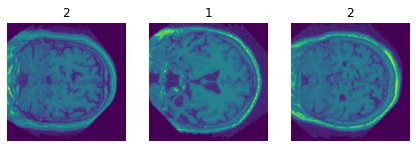

In [233]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image.reshape(176,176))
    plt.axis('off')
    plt.title(class_names[y_valid.iloc[index]], fontsize=12)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

['0', '1', '2', '4']

pandas.core.series.Series

# Problem 2:

###  Try the same neural network for the down sampled Oasis 1 dataset.

In [144]:
DS = 16             # Downsample rate, must be a multiple of 30976.
# You can also try DS=4

N_train = y_train.shape[0]  # The length of the training data
y_train = np.array(y_train)

if 30976/DS % 1 > 0:
    print("Downsample rate is not a multiple of 30976")
    DS = 1
    im_size = 30976
else:
    im_size = int(30976/DS)


data = np.zeros([609, im_size])

for i, file_name in enumerate(labels.Filename):
    img = np.mean(matplotlib.image.imread(file_dir + file_name),axis=2).reshape(-1)
    data[i,:] = img[::DS]            # Downsample the image

In [145]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(data, y, test_size=0.2, random_state=0)

In [146]:
print(data.shape)
print(X_train1.shape, y_train1.shape)
print(X_test1.shape, y_test1.shape)

(609, 1936)
(487, 1936) (487,)
(122, 1936) (122,)


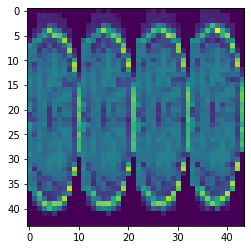

In [147]:
plt.imshow(X_train1[1].reshape(44,44))

In [148]:
print(X_train1.shape, X_test1.shape)
print(y_train1.shape, y_test1.shape)

(487, 1936) (122, 1936)
(487,) (122,)


In [149]:
y_train1


503    0
90     0
528    2
446    1
200    1
      ..
277    0
9      0
359    0
192    0
559    1
Name: CDR, Length: 487, dtype: int64

In [159]:
model1 = keras.models.Sequential()
model1.add(keras.layers.Flatten(input_shape=[1936]))
model1.add(keras.layers.Dense(300, activation="relu"))
model1.add(keras.layers.Dense(100, activation="relu"))
model1.add(keras.layers.Dense(10, activation="softmax"))

In [160]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [162]:
model1.layers

In [163]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1936)              0         
                                                                 
 dense (Dense)               (None, 300)               581100    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 612,210
Trainable params: 612,210
Non-trainable params: 0
_________________________________________________________________


In [165]:
keras.utils.plot_model(model1, "my_mri_model1.png", show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [166]:
hidden2 = model1.layers[1]
hidden2.name

'dense'

In [168]:
model1.get_layer(hidden2.name) is hidden2

True

In [169]:
weights1, biases1 = hidden2.get_weights()

In [170]:
weights1

array([[ 0.01704903, -0.00611184, -0.01524172, ..., -0.0192592 ,
         0.02686964, -0.04796888],
       [ 0.00331777, -0.02162187, -0.04084859, ...,  0.00419827,
        -0.01924339, -0.02900225],
       [-0.04309423, -0.04805638,  0.04945162, ..., -0.02950943,
         0.04958511, -0.05104826],
       ...,
       [ 0.0123988 , -0.01498482, -0.04120352, ...,  0.02418825,
         0.01021894,  0.01348232],
       [ 0.00468966, -0.01223113, -0.0240629 , ...,  0.04875263,
        -0.02289778,  0.02700316],
       [-0.00498009,  0.03607713,  0.04675157, ...,  0.01949016,
         0.02020126, -0.0209934 ]], dtype=float32)

In [171]:
weights1.shape

(1936, 300)

In [172]:
biases1


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [173]:
biases1.shape

(300,)

In [174]:
model1.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [176]:
history1 = model1.fit(X_train1, y_train1,
          batch_size=128 , epochs=30,
          verbose=1,
          validation_data=(X_test1, y_test1))

Epoch 1/30
4/4 [==============================] - 42s 65ms/step - loss: 1.4683 - accuracy: 0.5647 - val_loss: 1.2317 - val_accuracy: 0.5410
Epoch 2/30
4/4 [==============================] - 0s 79ms/step - loss: 1.0993 - accuracy: 0.5791 - val_loss: 1.1473 - val_accuracy: 0.5410
Epoch 3/30
4/4 [==============================] - 0s 16ms/step - loss: 1.0590 - accuracy: 0.5791 - val_loss: 1.1138 - val_accuracy: 0.5410
Epoch 4/30
4/4 [==============================] - 0s 15ms/step - loss: 1.0288 - accuracy: 0.5791 - val_loss: 1.0946 - val_accuracy: 0.5410
Epoch 5/30
4/4 [==============================] - 0s 14ms/step - loss: 1.0175 - accuracy: 0.5791 - val_loss: 1.0735 - val_accuracy: 0.5410
Epoch 6/30
4/4 [==============================] - 0s 16ms/step - loss: 1.0082 - accuracy: 0.5791 - val_loss: 1.0805 - val_accuracy: 0.5410
Epoch 7/30
4/4 [==============================] - 0s 12ms/step - loss: 1.0285 - accuracy: 0.5791 - val_loss: 1.0743 - val_accuracy: 0.5410
Epoch 8/30
4/4 [==========

In [177]:
historysgd1 = model1.fit(X_train1, y_train1, epochs=30,
                    validation_data=(X_test1, y_test1))

Epoch 1/30
16/16 [==============================] - 0s 7ms/step - loss: 0.9946 - accuracy: 0.5708 - val_loss: 1.1236 - val_accuracy: 0.2869
Epoch 2/30
16/16 [==============================] - 0s 4ms/step - loss: 1.0264 - accuracy: 0.5236 - val_loss: 1.3014 - val_accuracy: 0.2869
Epoch 3/30
16/16 [==============================] - 0s 5ms/step - loss: 1.0411 - accuracy: 0.5113 - val_loss: 1.1519 - val_accuracy: 0.2869
Epoch 4/30
16/16 [==============================] - 0s 6ms/step - loss: 0.9878 - accuracy: 0.5770 - val_loss: 1.5816 - val_accuracy: 0.2869
Epoch 5/30
16/16 [==============================] - 0s 4ms/step - loss: 1.0108 - accuracy: 0.5647 - val_loss: 1.1422 - val_accuracy: 0.5410
Epoch 6/30
16/16 [==============================] - 0s 5ms/step - loss: 0.9855 - accuracy: 0.5647 - val_loss: 1.1560 - val_accuracy: 0.2869
Epoch 7/30
16/16 [==============================] - 0s 6ms/step - loss: 1.0117 - accuracy: 0.5380 - val_loss: 1.0980 - val_accuracy: 0.5410
Epoch 8/30
16/16 [==

In [178]:
history1.params

{'verbose': 1, 'epochs': 30, 'steps': 4}

In [179]:
print(history1.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [181]:
history1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

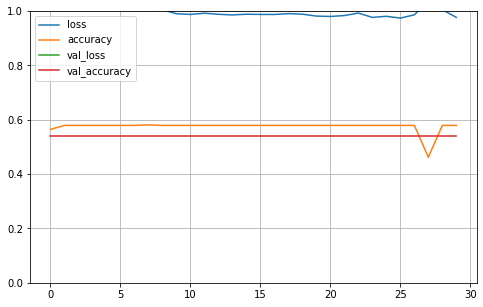

In [182]:
import pandas as pd

pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
 
plt.show()

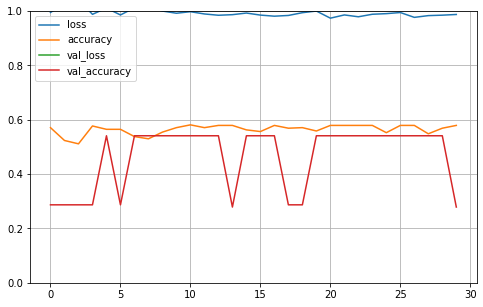

In [184]:
pd.DataFrame(historysgd1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
 
plt.show()

In [186]:
print(X_test1.shape, y_test1.shape)

(122, 1936) (122,)


In [188]:
model1.evaluate(X_test1, y_test1)

4/4 [==============================] - 0s 4ms/step - loss: 1.1471 - accuracy: 0.2787


[1.1471210718154907, 0.2786885201931]

In [192]:
X_new1 = X_test1[:3]


In [193]:
y_proba1 = model1.predict(X_new1)


In [194]:
y_proba1.round(2)

array([[0.43, 0.5 , 0.06, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.42, 0.51, 0.06, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.42, 0.51, 0.06, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [195]:
model1.evaluate(X_test1, y_test1)

4/4 [==============================] - 0s 4ms/step - loss: 1.1471 - accuracy: 0.2787


[1.1471210718154907, 0.2786885201931]

In [196]:
y_pred1 = np.argmax(model1.predict(X_new1), axis=-1)
y_pred1

array([1, 1, 1])

In [197]:
np.array(class_names)[y_pred1]

array(['1', '1', '1'], dtype='<U1')

In [198]:
y_new1 = y_test1[:3]
y_new1

576    2
52     1
531    2
Name: CDR, dtype: int64

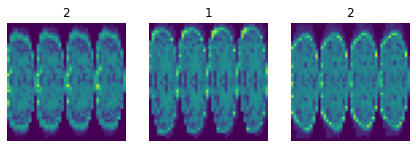

In [240]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new1):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image.reshape(44,44))
    plt.axis('off')
    plt.title(class_names[y_test1.iloc[index]], fontsize=12)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [241]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [242]:
model1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[1936]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [243]:
model1.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [244]:
history1 = model1.fit(X_train1 ,y_train1, epochs=1,
                    validation_data=(X_test1, y_test1),
                    callbacks=[expon_lr])

16/16 [==============================] - 1s 17ms/step - loss: 1.5349 - accuracy: 0.5770 - val_loss: 1.3866 - val_accuracy: 0.5410


Text(0, 0.5, 'Loss')

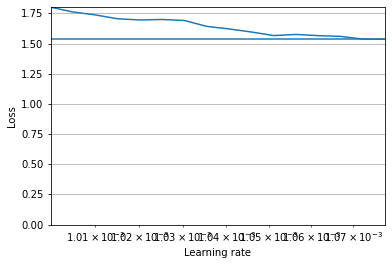

In [245]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [246]:
min(expon_lr.losses)

1.5348974466323853

In [247]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [248]:
model1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[1936]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model1.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=8e-1),
              metrics=["accuracy"])

In [249]:
history1 = model1.fit(X_train1, y_train1, epochs=30,
                    validation_data=(X_test1, y_test1))

Epoch 1/30
16/16 [==============================] - 1s 17ms/step - loss: 741.9238 - accuracy: 0.5359 - val_loss: 1.2497 - val_accuracy: 0.5410
Epoch 2/30
16/16 [==============================] - 0s 4ms/step - loss: 1.0937 - accuracy: 0.5791 - val_loss: 1.1310 - val_accuracy: 0.2869
Epoch 3/30
16/16 [==============================] - 0s 7ms/step - loss: 1.0367 - accuracy: 0.5380 - val_loss: 1.1796 - val_accuracy: 0.2869
Epoch 4/30
16/16 [==============================] - 0s 7ms/step - loss: 1.0048 - accuracy: 0.5708 - val_loss: 1.6913 - val_accuracy: 0.2869
Epoch 5/30
16/16 [==============================] - 0s 7ms/step - loss: 1.0358 - accuracy: 0.5647 - val_loss: 1.0837 - val_accuracy: 0.5410
Epoch 6/30
16/16 [==============================] - 0s 7ms/step - loss: 0.9918 - accuracy: 0.5647 - val_loss: 1.1702 - val_accuracy: 0.2869
Epoch 7/30
16/16 [==============================] - 0s 6ms/step - loss: 1.0184 - accuracy: 0.5380 - val_loss: 1.0873 - val_accuracy: 0.5410
Epoch 8/30
16/16 

In [250]:
model1.evaluate(X_test1, y_test1)

4/4 [==============================] - 0s 2ms/step - loss: 1.1034 - accuracy: 0.5410


[1.1034283638000488, 0.5409836173057556]

In [251]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, callbacks
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
model1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[1936]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model1.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=8e-1),
              metrics=["accuracy"])


In [252]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mri2_logs", "run_{:03d}".format(run_index))
run_logdir

'./my_mri2_logs/run_001'

In [253]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mri_logs2", "run_{:03d}".format(run_index))
run_logdir

'./my_mri_logs2/run_001'

In [254]:
early_stopping_cb = keras.callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mri2_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history1 = model1.fit(X_train1, y_train1, epochs=100,
                    validation_data=(X_test1, y_test1),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
16/16 [==============================] - 1s 20ms/step - loss: 741.9238 - accuracy: 0.5359 - val_loss: 1.2497 - val_accuracy: 0.5410
Epoch 2/100
16/16 [==============================] - 0s 11ms/step - loss: 1.0937 - accuracy: 0.5791 - val_loss: 1.1310 - val_accuracy: 0.2869
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 1.0367 - accuracy: 0.5380 - val_loss: 1.1796 - val_accuracy: 0.2869
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 1.0048 - accuracy: 0.5708 - val_loss: 1.6913 - val_accuracy: 0.2869
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 1.0358 - accuracy: 0.5647 - val_loss: 1.0837 - val_accuracy: 0.5410
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.9918 - accuracy: 0.5647 - val_loss: 1.1702 - val_accuracy: 0.2869
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 1.0184 - accuracy: 0.5380 - val_loss: 1.0873 - val_accuracy: 0.5410
Epoch 8/1

In [255]:
model1 = keras.models.load_model("my_mri2_model.h5") # rollback to best model
model1.evaluate(X_test1, y_test1)
model1.evaluate(X_train1, y_train1)

16/16 [==============================] - 0s 2ms/step - loss: 0.9926 - accuracy: 0.5791


[0.9925571084022522, 0.5790554285049438]